In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./data/house_info_update1.csv", encoding= 'utf-8-sig', thousands=',')

In [4]:
df

,danjigubn,sedesu,nambang,sigog,siheg,gukag,eill,guard,danjicode,clean,...,danjiname,amenitiesCnt,price,market,school,station,bank,café,hospital,ipji
0,아파트,69,개별난방,금강KCC건설,금강kcc건설,NaN,1.0,3.0,A10024154,1.0,...,금강KCC아파트,4,515,30,80,20,26,87,40,283
1,NaN,116,개별난방,삼호,삼호,NaN,NaN,NaN,A10024322,NaN,...,삼호한숲아파트,0,1516,40,40,20,9,31,18,158
2,NaN,122,개별난방,KCC건설,KCC건설,한국주택시설관리(주),16.0,NaN,A10024334,NaN,...,마포KCC웰츠타워,1,1162,30,20,250,45,145,106,596
3,NaN,136,개별난방,아이씨건설,현대산업개발,광인산업(주),3.0,0.0,A10024353,2.0,...,염창현대아이파크아파트,3,1236,10,20,50,21,46,37,184
4,아파트,114,개별난방,고려산업개발(주),고려산업개발(주),서일개발(주),1.0,2.0,A10024367,1.0,...,가양동 강나루 2차현대아파트,4,909,100,140,50,21,47,64,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,아파트,334,지역난방,"벽산건설,금호건설",sh공사,율산개발(주),5.0,4.0,A41279927,4.0,...,은평뉴타운구파발10단지1관리,7,532,10,20,20,2,4,1,57
2449,아파트,412,지역난방,대우건설,sh공사,광인산업(주),5.0,4.0,A41279929,5.0,...,은평뉴타운제각말5단지제4,7,559,10,20,0,1,7,0,38
2450,아파트,426,지역난방,한라,SH공사,율산개발(주),5.0,5.0,A41279932,4.0,...,은평뉴타운기자촌11단지,8,477,10,60,0,2,11,0,83
2451,NaN,256,NaN,NaN,NaN,NaN,NaN,NaN,A44377203,NaN,...,아주,0,1017,50,40,60,31,133,73,387


In [5]:
df = df.dropna(thresh=24)

In [6]:
mask = df['danjigubn'].isin(['아파트'])

In [7]:
df = df[mask]

In [8]:
categories = df.columns[df.dtypes=='object']
print(categories)

Index(['danjigubn', 'nambang', 'sigog', 'siheg', 'gukag', 'danjicode', 'food',
       'water', 'gucha', 'amenities', 'doro', 'donli', 'danjiname'],
      dtype='object')


In [9]:
df = df.drop(['gukag'], axis=1)

In [10]:
# 결측치 수가 상위 10인 변수 확인하기
df.isnull().sum().sort_values(ascending=False).head(10)

food         61
amenities    43
ellbe        24
siheg        15
sigog        13
water        11
gucha         8
giha          6
cctv          6
gisa          2
dtype: int64

In [13]:
df.food.value_counts()

음식물쓰레기종량제    1365
차량수거방식        526
거점장비수거방식      149
기타             83
Name: food, dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sedesu,2184.0,597.195513,627.832328,0.0,220.00,396.0,719.25,6864.0
eill,2184.0,6.299588,5.198751,1.0,4.00,5.0,7.25,61.0
guard,2182.0,9.067828,12.780121,0.0,3.00,6.0,10.00,234.0
clean,2183.0,5.879524,6.617143,0.0,2.00,4.0,7.00,80.0
ellbe,2160.0,13.956481,14.859663,0.0,5.00,10.0,18.00,207.0
gisa,2182.0,198.367553,373.882952,0.0,20.00,74.5,210.75,4500.0
giha,2178.0,424.062902,675.214714,0.0,90.00,216.0,516.00,9486.0
cctv,2178.0,106.751148,140.739727,0.0,37.00,64.0,122.00,2150.0
amenitiesCnt,2184.0,4.840201,1.941097,0.0,4.00,4.0,6.00,11.0
price,2184.0,930.857143,623.856426,-1057.0,510.75,820.5,1239.75,5532.0


In [15]:
# 수치데이터만 추출하기

df_num = df.select_dtypes(include=[np.number])
df_num

,sedesu,eill,guard,clean,ellbe,gisa,giha,cctv,amenitiesCnt,price,market,school,station,bank,café,hospital,ipji
0,69,1.0,3.0,1.0,2.0,0.0,76.0,31.0,4,515,30,80,20,26,87,40,283
4,114,1.0,2.0,1.0,3.0,0.0,124.0,26.0,4,909,100,140,50,21,47,64,422
7,115,2.0,2.0,1.0,5.0,27.0,93.0,32.0,3,320,40,20,20,16,51,33,180
18,115,1.0,2.0,1.0,4.0,78.0,52.0,29.0,2,478,40,100,40,15,41,9,245
19,118,1.0,2.0,1.0,6.0,38.0,92.0,20.0,4,503,20,100,0,13,58,49,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,189,3.0,2.0,3.0,13.0,20.0,249.0,117.0,5,541,10,20,0,2,16,0,48
2447,126,3.0,2.0,2.0,3.0,20.0,213.0,59.0,6,116,20,0,0,1,3,0,24
2448,334,5.0,4.0,4.0,20.0,49.0,497.0,155.0,7,532,10,20,20,2,4,1,57
2449,412,5.0,4.0,5.0,21.0,37.0,493.0,177.0,7,559,10,20,0,1,7,0,38


In [109]:
num_features = sorted(list(set(df_num)))
num_features

['amenitiesCnt',
 'areadaprice',
 'bank',
 'cafe',
 'cctv',
 'clean',
 'eill',
 'ellbe',
 'giha',
 'gisa',
 'guard',
 'hospital',
 'market',
 'school',
 'sedesu',
 'station']

In [110]:
df_num_rs = df_num[num_features]

In [111]:
# 다수의 데이터가 0인 변수 확인하기

for col in num_features:
    if df_num_rs.describe()[col]['25%'] == 0:
        print(col, len(df_num_rs[df_num_rs[col]==0]))

In [112]:
# 특정 값만 가지는 변수 확인하기

for col in num_features:
    if df_num_rs[col].nunique()<15:
        print(col, df_num_rs[col].nunique())

amenitiesCnt 12
market 13
school 11
station 9


In [113]:
# 이상치가 있는지 확인하기

for col in num_features:
    tmp_df = df_num_rs[(df_num_rs[col] > df_num_rs[col].mean() + df_num_rs[col].std() *3) | (df_num_rs[col] < df_num_rs[col].mean() - df_num_rs[col].std() *3)]
                       
    print(col, len(tmp_df))

amenitiesCnt 0
areadaprice 38
bank 22
cafe 41
cctv 35
clean 38
eill 40
ellbe 38
giha 31
gisa 49
guard 42
hospital 25
market 14
school 12
sedesu 43
station 38


<AxesSubplot:xlabel='bank', ylabel='areadaprice'>

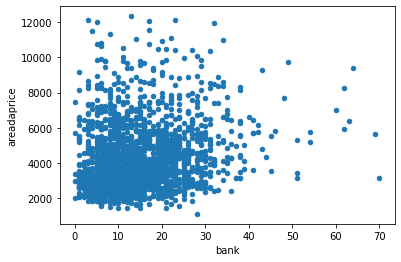

In [114]:
# 이상치를 포함하고 있는 변수 분포를 시각화하기

df.plot.scatter(x='bank', y='areadaprice')

<AxesSubplot:xlabel='sedesu', ylabel='areadaprice'>

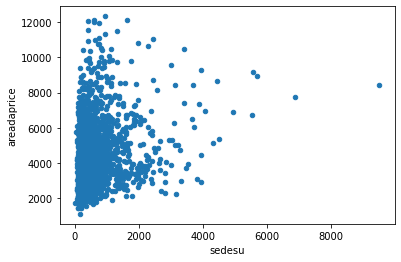

In [115]:
df.plot.scatter(x='sedesu', y='areadaprice')

<AxesSubplot:xlabel='station', ylabel='areadaprice'>

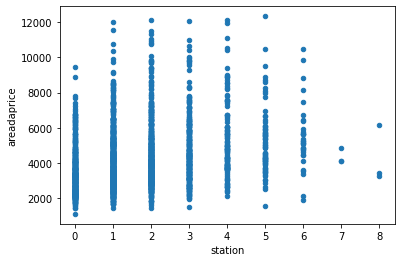

In [116]:
df.plot.scatter(x='station', y='areadaprice')

In [118]:
df[df['station'] > 7]

,danjigubn,sedesu,nambang,sigog,siheg,eill,guard,danjicode,clean,food,...,donli,danjiname,amenitiesCnt,areadaprice,market,school,station,bank,cafe,hospital
1022,아파트,273,개별난방,GS건설(주),휴먼넥스(주),5.0,6.0,A10071301,4.0,차량수거방식,...,충무로4가,남산센트럴자이,8,3429.0,0,2,8,51,163,41
1878,아파트,1341,개별난방,GS건설주식회사,만리제2지구재개발 정비사업주택조합,19.0,13.0,A10026881,20.0,음식물쓰레기종량제,...,만리동2가,서울역센트럴자이아파트,8,6173.0,2,5,8,13,49,25
2311,아파트,220,개별난방,롯데건설,롯데건설,9.0,4.0,A11087601,8.0,차량수거방식,...,숭인동,롯데캐슬천지인,3,3237.5,5,1,8,29,63,52
